In [32]:
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib notebook

In [2]:
pca_path = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\HeatMap\CSV"

First Visit

In [3]:
first_data = pd.read_csv(pca_path + "\heatmap_vectors_first.csv")
first_data = first_data.set_index('Unnamed: 0')
first_data.index

Index(['L0.1_c-3_m10', 'L0.1_c-3_m12', 'L0.1_c-3_m20', 'L0.1_c-3_m21',
       'L0.1_c-3_m22', 'L0.1_c-3_m23', 'L0.1_c-3_m24', 'L0.1_c-3_m25',
       'L0.1_c-3_m27', 'L0.1_c-3_m2', 'L0.1_c-3_m32', 'L0.1_c-3_m34',
       'L0.1_c-3_m37', 'L0.1_c-3_m38', 'L0.1_c-3_m39', 'L0.1_c-3_m40',
       'L0.1_c-3_m41', 'L0.1_c-3_m43', 'L0.1_c-3_m44', 'L0.1_c-3_m45',
       'L0.1_c-3_m46', 'L0.1_c-3_m47', 'L0.1_c-3_m48', 'L0.1_c-3_m49',
       'L0.1_c-3_m50', 'L0.1_c-3_m54', 'L0.1_c-3_m57', 'L0.1_c-3_m5',
       'L0.1_c-3_m8', 'L50_c-3_m10', 'L50_c-3_m12', 'L50_c-3_m13',
       'L50_c-3_m14', 'L50_c-3_m15', 'L50_c-3_m21', 'L50_c-3_m22',
       'L50_c-3_m24', 'L50_c-3_m25', 'L50_c-3_m26', 'L50_c-3_m2',
       'L50_c-3_m30', 'L50_c-3_m32', 'L50_c-3_m33', 'L50_c-3_m34',
       'L50_c-3_m35', 'L50_c-3_m37', 'L50_c-3_m38', 'L50_c-3_m39',
       'L50_c-3_m45', 'L50_c-3_m49', 'L50_c-3_m50', 'L50_c-3_m51',
       'L50_c-3_m58', 'L50_c-3_m6', 'L50_c-3_m9'],
      dtype='object', name='Unnamed: 0')

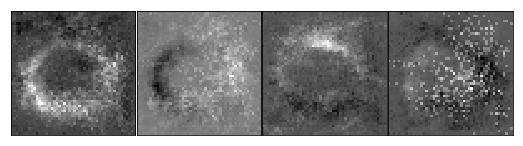

In [4]:
from sklearn.decomposition import PCA
first_pca = PCA(n_components=4)
first_pca_components = first_pca.fit_transform(first_data)


fig, axes = plt.subplots(1,4,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
     ax.imshow(first_pca.components_[i].reshape(50,50),cmap="gray")
plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Projections\\First_Visit_components.png")

In [5]:
first_var = first_pca.explained_variance_ratio_
first_var

array([0.07652422, 0.06879438, 0.05641381, 0.04612886])

In [6]:
label = ["low"]*29
label.extend(["high"]*26)
label
label_data = pd.DataFrame(data = label, columns = ["Light_Level"], index=first_data.index)

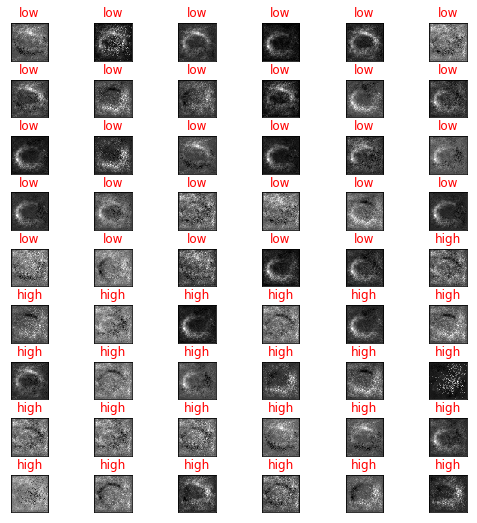

In [7]:
first_transform = first_pca.transform(first_data)
projected_first = first_pca.inverse_transform(first_transform)
fig, axes = plt.subplots(9,6,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.5, wspace=0.0))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_first[i].reshape(50,50),cmap = 'gray')
    ax.set_title(label[i], color = 'r')
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Projections\\firstVisit_PCAspace.png")

In [8]:
first_pca_data = pd.DataFrame(data = first_pca_components, columns = ["PCA1", "PCA2", "PCA3", "PCA4"], index=first_data.index)
first_pca_data

,PCA1,PCA2,PCA3,PCA4
Unnamed: 0,,,,
L0.1_c-3_m10,-1.077944,0.440508,0.834211,0.019175
L0.1_c-3_m12,0.056854,0.290899,0.662713,0.723369
L0.1_c-3_m20,1.528810,-0.387307,3.279950,0.113946
L0.1_c-3_m21,0.372665,-0.907759,0.055227,0.222455
L0.1_c-3_m22,2.803209,0.332689,2.835184,-1.019486
L0.1_c-3_m23,-1.519099,-0.155083,-0.188019,-0.206114
L0.1_c-3_m24,-0.060135,1.211045,1.711439,-1.293225
L0.1_c-3_m25,0.286760,0.568047,-1.221879,-0.674505
L0.1_c-3_m27,-0.447632,0.885846,-0.240875,-0.022033


In [9]:
first_pca_label = pd.concat([first_pca_data, label_data], axis = 1)
first_pca_label

,PCA1,PCA2,PCA3,PCA4,Light_Level
Unnamed: 0,,,,,
L0.1_c-3_m10,-1.077944,0.440508,0.834211,0.019175,low
L0.1_c-3_m12,0.056854,0.290899,0.662713,0.723369,low
L0.1_c-3_m20,1.528810,-0.387307,3.279950,0.113946,low
L0.1_c-3_m21,0.372665,-0.907759,0.055227,0.222455,low
L0.1_c-3_m22,2.803209,0.332689,2.835184,-1.019486,low
L0.1_c-3_m23,-1.519099,-0.155083,-0.188019,-0.206114,low
L0.1_c-3_m24,-0.060135,1.211045,1.711439,-1.293225,low
L0.1_c-3_m25,0.286760,0.568047,-1.221879,-0.674505,low
L0.1_c-3_m27,-0.447632,0.885846,-0.240875,-0.022033,low


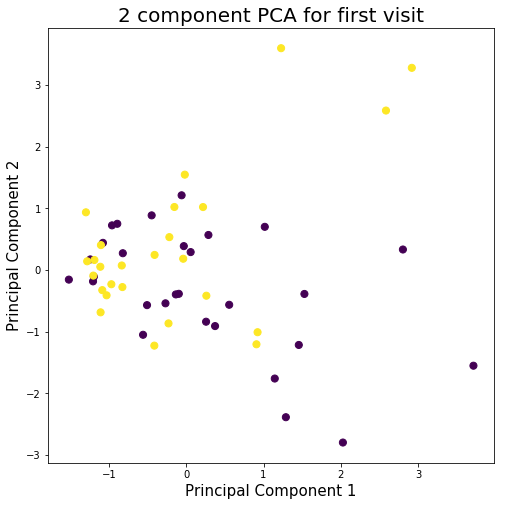

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for first visit', fontsize = 20)

colors = np.linspace(0, 1, 2)
colordict = dict(zip(['low', 'high'], colors))  

label_data["Color"] = label_data["Light_Level"].apply(lambda x: colordict[x])

ax.scatter(first_pca_label.loc[:, 'PCA1']
               , first_pca_label.loc[:, 'PCA2']
               , c = label_data.Color
               , s = 50)
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Scatter\\FirstVisit_PCAspace.png")

Last Visit

In [12]:
hmv_data_last = pd.read_csv(pca_path + "\heatmap_vectors_last.csv")
hmv_data_last = hmv_data_last.set_index('Unnamed: 0')
hmv_data_last.index

Index(['L0.1_c-3_m10', 'L0.1_c-3_m12', 'L0.1_c-3_m20', 'L0.1_c-3_m21',
       'L0.1_c-3_m22', 'L0.1_c-3_m23', 'L0.1_c-3_m25', 'L0.1_c-3_m27',
       'L0.1_c-3_m2', 'L0.1_c-3_m32', 'L0.1_c-3_m34', 'L0.1_c-3_m37',
       'L0.1_c-3_m38', 'L0.1_c-3_m40', 'L0.1_c-3_m41', 'L0.1_c-3_m43',
       'L0.1_c-3_m44', 'L0.1_c-3_m45', 'L0.1_c-3_m46', 'L0.1_c-3_m47',
       'L0.1_c-3_m48', 'L0.1_c-3_m49', 'L0.1_c-3_m50', 'L0.1_c-3_m54',
       'L0.1_c-3_m57', 'L0.1_c-3_m5', 'L0.1_c-3_m8', 'L50_c-3_m10',
       'L50_c-3_m12', 'L50_c-3_m13', 'L50_c-3_m14', 'L50_c-3_m15',
       'L50_c-3_m21', 'L50_c-3_m22', 'L50_c-3_m26', 'L50_c-3_m2',
       'L50_c-3_m30', 'L50_c-3_m32', 'L50_c-3_m33', 'L50_c-3_m34',
       'L50_c-3_m35', 'L50_c-3_m37', 'L50_c-3_m38', 'L50_c-3_m39',
       'L50_c-3_m45', 'L50_c-3_m6', 'L50_c-3_m9', 'L50_c-3_m49', 'L50_c-3_m50',
       'L50_c-3_m51', 'L50_c-3_m58'],
      dtype='object', name='Unnamed: 0')

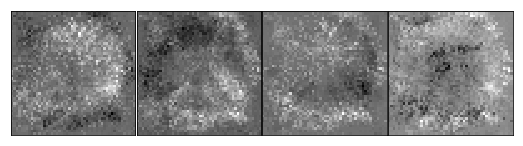

In [13]:
from sklearn.decomposition import PCA
last_pca = PCA(n_components=4)
last_pca_components = last_pca.fit_transform(hmv_data_last)


fig, axes = plt.subplots(1,4,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))




for i, ax in enumerate(axes.flat):
     ax.imshow(last_pca.components_[i].reshape(50,50),cmap="gray")
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Projections\\Last_Visit_components.png")

In [14]:
last_var = last_pca.explained_variance_ratio_
last_var

array([0.06159636, 0.05479517, 0.05245797, 0.04411698])

In [15]:
label_last = ["low"]*27
label_last.extend(['high']*24)

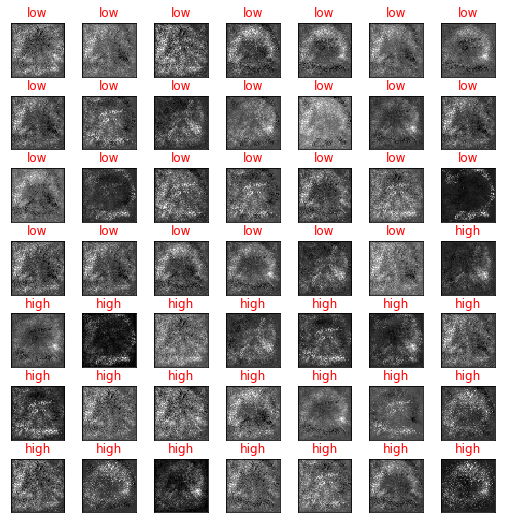

In [16]:
last_transform = last_pca.transform(hmv_data_last)
projected_last = last_pca.inverse_transform(last_transform)
fig, axes = plt.subplots(7,7,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.35, wspace=0.0))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_last[i].reshape(50,50),cmap = 'gray')
    ax.set_title(label_last[i], color = 'r')
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Projections\\lastVisit_PCAspace.png")

In [17]:
last_pca_data = pd.DataFrame(data = last_pca_components, columns = ["PCA1", "PCA2", "PCA3", "PCA4"], index=hmv_data_last.index)
last_pca_data

,PCA1,PCA2,PCA3,PCA4
Unnamed: 0,,,,
L0.1_c-3_m10,-0.669908,0.094557,-0.408522,0.289036
L0.1_c-3_m12,-0.897736,-0.981784,-0.180662,-0.115427
L0.1_c-3_m20,-0.478574,-0.079061,-0.214742,-0.324598
L0.1_c-3_m21,0.317814,-1.104659,0.102045,0.286516
L0.1_c-3_m22,0.617308,-0.938453,-0.276627,0.747926
L0.1_c-3_m23,-0.501869,-1.053833,-0.023101,-0.078546
L0.1_c-3_m25,1.896388,-0.586847,-0.898484,1.599506
L0.1_c-3_m27,-0.668918,-0.694051,-0.058062,0.076106
L0.1_c-3_m2,-0.304897,0.182738,0.166172,-1.757766


In [18]:
label_last_data = pd.DataFrame(data = label_last, columns = ["Light_Level"], index=last_pca_data.index)
last_pca_label = pd.concat([last_pca_data, label_last_data], axis = 1)
last_pca_label

,PCA1,PCA2,PCA3,PCA4,Light_Level
Unnamed: 0,,,,,
L0.1_c-3_m10,-0.669908,0.094557,-0.408522,0.289036,low
L0.1_c-3_m12,-0.897736,-0.981784,-0.180662,-0.115427,low
L0.1_c-3_m20,-0.478574,-0.079061,-0.214742,-0.324598,low
L0.1_c-3_m21,0.317814,-1.104659,0.102045,0.286516,low
L0.1_c-3_m22,0.617308,-0.938453,-0.276627,0.747926,low
L0.1_c-3_m23,-0.501869,-1.053833,-0.023101,-0.078546,low
L0.1_c-3_m25,1.896388,-0.586847,-0.898484,1.599506,low
L0.1_c-3_m27,-0.668918,-0.694051,-0.058062,0.076106,low
L0.1_c-3_m2,-0.304897,0.182738,0.166172,-1.757766,low


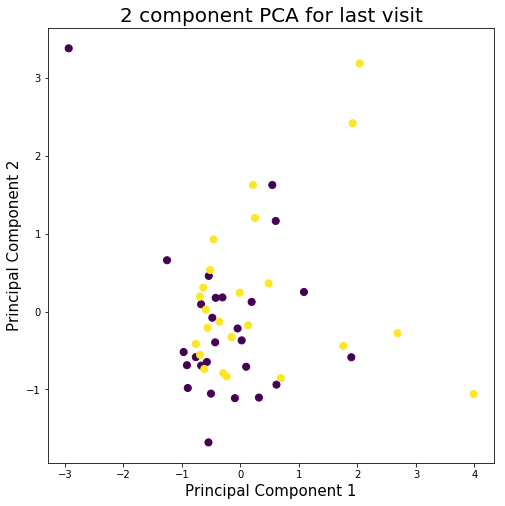

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for last visit', fontsize = 20)

colors = np.linspace(0, 1, 2)
colordict = dict(zip(['low', 'high'], colors))  

label_last_data["Color"] = label_last_data["Light_Level"].apply(lambda x: colordict[x])

ax.scatter(last_pca_label.loc[:, 'PCA1']
               , last_pca_label.loc[:, 'PCA2']
               , c = label_last_data.Color
               , s = 50)
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Scatter\\LastVisit_PCAspace.png")

First and Last

In [20]:
Light_Visit = pd.concat([first_data, hmv_data_last])
Light_Visit

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
L0.1_c-3_m10,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
L0.1_c-3_m12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L0.1_c-3_m20,0.016393,0.000000,0.000000,0.032787,0.049180,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L0.1_c-3_m21,0.000000,0.000000,0.040816,0.040816,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,...,0.020408,0.020408,0.000000,0.040816,0.040816,0.020408,0.000000,0.000000,0.020408,0.000000
L0.1_c-3_m22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L0.1_c-3_m23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L0.1_c-3_m24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L0.1_c-3_m25,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L0.1_c-3_m27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


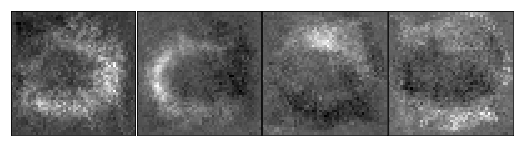

In [21]:
from sklearn.decomposition import PCA
Light_Visit_pca = PCA(n_components=4)
Light_Visit_pca_components = Light_Visit_pca.fit_transform(Light_Visit)


fig, axes = plt.subplots(1,4,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))




for i, ax in enumerate(axes.flat):
     ax.imshow(Light_Visit_pca.components_[i].reshape(50,50),cmap="gray")
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Projections\\First_Last_Visit_components.png")

In [22]:
Light_Visit_var = Light_Visit_pca.explained_variance_ratio_
Light_Visit_var

array([0.05375678, 0.04603088, 0.04256422, 0.03064499])

In [23]:
label

['low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high']

In [24]:
light = []
light

[]

In [25]:
visit = ["first"]*55
visit.extend(["last"]*51)
visit_data = pd.DataFrame(data = visit, columns = ["Visit"], index = Light_Visit.index)

light.extend(label)
light
light.extend(label_last)
light_data = pd.DataFrame(data = light, columns = ["Light_Level"], index=Light_Visit.index)


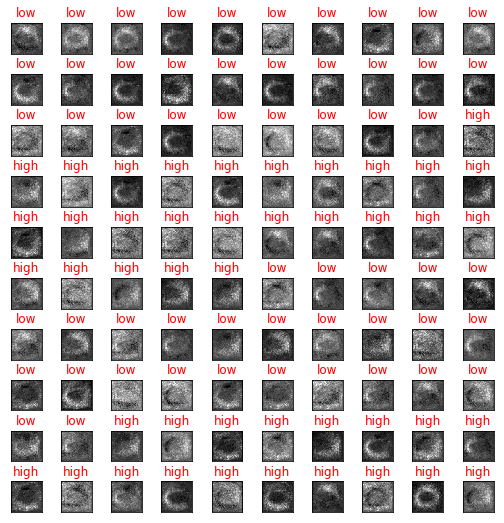

In [26]:
Light_Visit_transform = Light_Visit_pca.transform(Light_Visit)
projected_Light_Visit = Light_Visit_pca.inverse_transform(Light_Visit_transform)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.65, wspace=0.0))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_Light_Visit[i].reshape(50,50),cmap = 'gray')
    ax.set_title(light[i], color = 'r')
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Projections\\first_and_last.png")

In [27]:
Light_Visit_pca_data = pd.DataFrame(data = Light_Visit_pca_components, columns = ["PCA1", "PCA2", "PCA3", "PCA4"], index=Light_Visit.index)
Light_Visit_pca_data

,PCA1,PCA2,PCA3,PCA4
Unnamed: 0,,,,
L0.1_c-3_m10,-0.444226,-0.525982,1.094495,0.024333
L0.1_c-3_m12,0.463302,-0.023701,0.477034,-0.599247
L0.1_c-3_m20,1.507382,1.648353,2.221115,-0.868909
L0.1_c-3_m21,-0.089995,1.054270,-0.091747,-0.578527
L0.1_c-3_m22,2.873579,1.453362,1.821377,0.956802
L0.1_c-3_m23,-1.392168,-0.420871,0.221414,0.216735
L0.1_c-3_m24,0.824325,-0.774406,1.545031,0.479477
L0.1_c-3_m25,0.426430,-0.369944,-1.308727,0.989594
L0.1_c-3_m27,0.238388,-0.954384,0.029544,0.152383


In [28]:
Light_Visit_pca_label = pd.concat([Light_Visit_pca_data, visit_data, light_data], axis = 1)
Light_Visit_pca_label

,PCA1,PCA2,PCA3,PCA4,Visit,Light_Level
Unnamed: 0,,,,,,
L0.1_c-3_m10,-0.444226,-0.525982,1.094495,0.024333,first,low
L0.1_c-3_m12,0.463302,-0.023701,0.477034,-0.599247,first,low
L0.1_c-3_m20,1.507382,1.648353,2.221115,-0.868909,first,low
L0.1_c-3_m21,-0.089995,1.054270,-0.091747,-0.578527,first,low
L0.1_c-3_m22,2.873579,1.453362,1.821377,0.956802,first,low
L0.1_c-3_m23,-1.392168,-0.420871,0.221414,0.216735,first,low
L0.1_c-3_m24,0.824325,-0.774406,1.545031,0.479477,first,low
L0.1_c-3_m25,0.426430,-0.369944,-1.308727,0.989594,first,low
L0.1_c-3_m27,0.238388,-0.954384,0.029544,0.152383,first,low


<IPython.core.display.Javascript object>


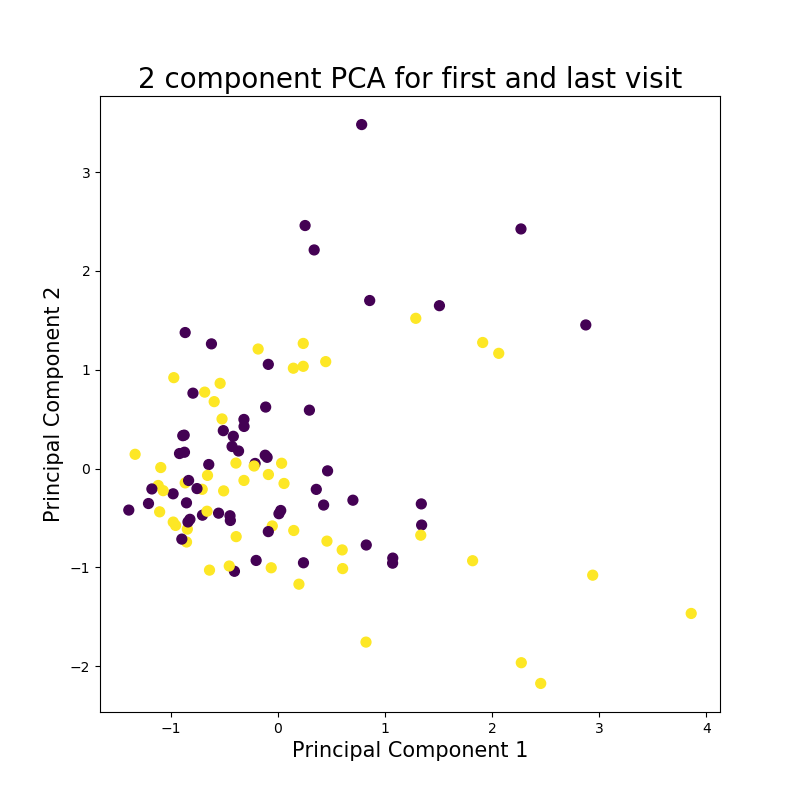

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for first and last visit', fontsize = 20)

colors = np.linspace(0, 1, 2)
colordict = dict(zip(['low', 'high'], colors))  

Light_Visit_pca_label["Color"] = light_data["Light_Level"].apply(lambda x: colordict[x])

ax.scatter(Light_Visit_pca_label.loc[:, 'PCA1']
               , Light_Visit_pca_label.loc[:, 'PCA2']
               , c = Light_Visit_pca_label.Color
               , s = 50)
# plt.savefig(r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Motion_Analysis\PCA\Scatter\\First_LastVisit_PCAspace.png")

<IPython.core.display.Javascript object>


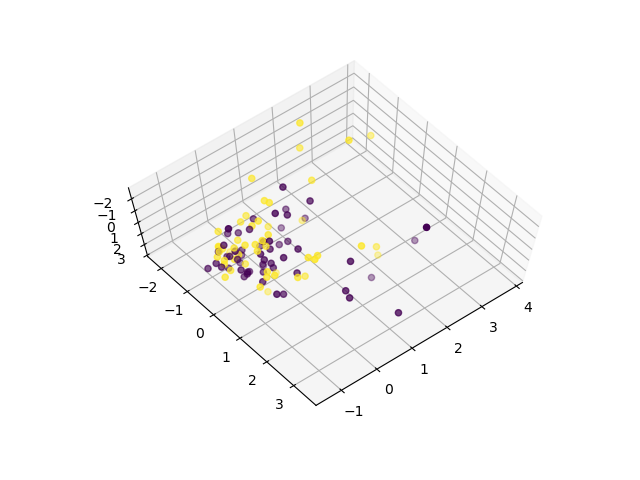

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Light_Visit_pca_label["Color"] = Light_Visit_pca_label["Light_Level"].apply(lambda x: colordict[x])
ax.scatter3D(Light_Visit_pca_label.loc[:, 'PCA1'], Light_Visit_pca_label.loc[:, 'PCA2'], Light_Visit_pca_label.loc[:, 'PCA3'], c = Light_Visit_pca_label.Color)

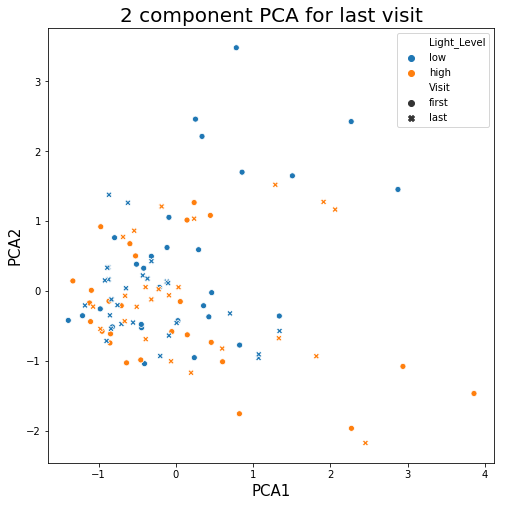

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for last visit', fontsize = 20)


sns.scatterplot(x="PCA1", y="PCA2", hue="Light_Level", style="Visit", data = Light_Visit_pca_label)
# plt.savefig(r"C:\Users\Daniellab\Documents\Mahad\PCA test case\PCA space scatterplot\\LastVisit_PCAspace.png")

In [31]:
# figure out how to remove outlier/ what's causing such a distinct movement of that one point